# <font color='red'>Human Activity Recognition</font>

# 1. Understanding the data

## 1.1 Description

* This project is to build a model that predicts the human activities such as __Walking, Walking_Upstairs, Walking_Downstairs, Sitting, Standing and Laying__.

* This dataset is collected from 30 persons(referred as subjects in this dataset), performing different activities with a smartphone to their waists. The data is recorded with the help of sensors __Accelerometer and Gyroscope__ in that smartphone. This experiment was video recorded to label the data manually.

__How was the data recorded?__

* Using the sensors(Accelerometer and Gyroscope) in a smartphone, '3-axial linear acceleration'(_tAcc-XYZ_) readings and '3-axial angular velocity' (_tGyro-XYZ_) readings were captured respectively with several variations. 

    - prefix __t__ in those metrics denotes time.
    - suffix __XYZ__ represents 3-axial signals in X, Y, and Z directions.

## 1.2 Data Overview

* Here, we've two different representations of the same data.

* __Raw Time-Series Data__
    - All the data is present in the 'UCI_HAR_dataset/' folder in the current working directory.
    - Features present are (body_acc_X, Y, Z), (body_gyro_X, Y, Z) and (total_acc_X, Y, Z)
    - __Train Data__
        - <font color='blue'>UCI_HAR_Dataset/train/Inertial Signals/</font>
    - __Test Data__
        - <font color='blue'>UCI_HAR_Dataset/test/Inertial Signals/</font>

        
        
* __Engineered Features Data__
    - All the data is present in 'UCI_HAR_dataset/' folder in current working directory.
    - Feature names are present in 'UCI_HAR_dataset/features.txt'
    - ___Train Data___
        - <font color='blue'>UCI_HAR_dataset/train/</font>
    - ___Test Data___
        - <font color='blue'>UCI_HAR_dataset/test/</font>


* __Data Size : 27 MegaBytes__

## 1.3 Features in the Data

1. These sensor signals are preprocessed by applying noise filters and then sampled in fixed-width windows(sliding windows) of 2.56 seconds each with 50% overlap. ie., each window has 128 readings. 

2. From Each window, a feature vector was obtained by calculating variables from the time and frequency domain.
> In our dataset, each datapoint represents a window with different readings. 
3. The accelertion signal was saperated into Body and Gravity acceleration signals(___tBodyAcc-XYZ___ and ___tGravityAcc-XYZ___) using some low pass filter with corner frequecy of 0.3Hz.

4. After that, the body linear acceleration and angular velocity were derived in time to obtian _jerk signals_ (___tBodyAccJerk-XYZ___ and ___tBodyGyroJerk-XYZ___). 

5. The magnitude of these 3-dimensional signals were calculated using the Euclidian norm. This magnitudes are represented as features with names like _tBodyAccMag_, _tGravityAccMag_, _tBodyAccJerkMag_, _tBodyGyroMag_ and _tBodyGyroJerkMag_.

6. Finally, We've got frequency domain signals from some of the available signals by applying a FFT (Fast Fourier Transform). These signals obtained were labeled with ___prefix 'f'___ just like original signals with ___prefix 't'___. These signals are labeled as ___fBodyAcc-XYZ___, ___fBodyGyroMag___ etc.,.

7. These are the signals that we got so far.
     - __tBodyAcc-XYZ__
     - __tGravityAcc-XYZ__
     - __tBodyAccJerk-XYZ__
     - __tBodyGyro-XYZ__
     - __tBodyGyroJerk-XYZ__
     - __tBodyAccMag__
     - __tGravityAccMag__
     - __tBodyAccJerkMag__
     - __tBodyGyroMag__
     - __tBodyGyroJerkMag__
     - __fBodyAcc-XYZ__
     - __fBodyAccJerk-XYZ__
     - __fBodyGyro-XYZ__
     - __fBodyAccMag__
     - __fBodyAccJerkMag__
     - __fBodyGyroMag__
     - __fBodyGyroJerkMag__

8. We can esitmate some set of variables from the above signals. ie., We will estimate the following properties on each and every signal that we recoreded so far.
    - ___mean()___: Mean value
    - ___std()___: Standard deviation
    - ___mad()___: Median absolute deviation 
    - ___max()___: Largest value in array
    - ___min()___: Smallest value in array
    - ___sma()___: Signal magnitude area
    - ___energy()___: Energy measure. Sum of the squares divided by the number of values. 
    - ___iqr()___: Interquartile range 
    - ___entropy()___: Signal entropy
    - ___arCoeff()___: Autorregresion coefficients with Burg order equal to 4
    - ___correlation()___: correlation coefficient between two signals
    - ___maxInds()___: index of the frequency component with largest magnitude
    - ___meanFreq()___: Weighted average of the frequency components to obtain a mean frequency
    - ___skewness()___: skewness of the frequency domain signal 
    - ___kurtosis()___: kurtosis of the frequency domain signal 
    - ___bandsEnergy()___: Energy of a frequency interval within the 64 bins of the FFT of each window.
    - ___angle()___: Angle between to vectors.

9. We can obtain some other vectors by taking the average of signals in a single window sample. These are used on the angle() variable.
    - __gravityMean__
    - __tBodyAccMean__
    - __tBodyAccJerkMean__
    - __tBodyGyroMean__
    - __tBodyGyroJerkMean__


## 1.4 Quick Overview


* Accelerometer and Gyroscope readings are taken from 30 volunteers(referred as subjects) while performing the following 6 Activities.

    - Walking     
    - WalkingUpstairs 
    - WalkingDownstairs 
    - Standing 
    - Sitting 
    - Lying.


* Readings are divided into a window of 2.56 seconds with 50% overlapping. 

* Accelerometer readings are divided into gravity acceleration and body acceleration readings,
  which has x,y and z components each.

* Gyroscope readings are the measure of angular velocities which has X, Y and Z components.

* Jerk signals are calculated for BodyAcceleration readings(derivative).

* Fourier Transforms are made on the above time readings to obtain frequency readings.

* Now, on all the base signal readings., mean, max, mad, sma, arcoefficient, engerybands,entropy etc., are calculated for each window.

* We get a feature vector of 561 features and these features are given in the dataset.

* Each window of readings is a datapoint of 561 features.


# 2. ML Problem Formulation

## 2.1 Problem Statement

* Given a new datapoint, predict the activity performed.

## 2.2 Performance Metrics

* As this is a multi-class classification problem, We'll measure the performance of any model by __Accuracy and Multi-Class Log-Loss__.


# 3. Data Preprocessing

In [1]:
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE

sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'
plt.rcParams['figure.dpi'] = 100

In [2]:
with open('UCI_HAR_Dataset/features.txt') as feat_file:
    features = [f.split()[1] for f in feat_file.readlines()]
    
print(f"Number of features in the data : {len(features)}")

Number of features in the data : 561


__<font color='blue'>The 561 features were engineered from 33 signals by applying 17 different operations on them.</font>__ 

## 3.1 Train, Test Split


* 30 subjects(volunteers) data is randomly split to 70% (21) test and 30% (9) train data.
* Each datapoint corresponds one of the 6 Activities performed.


__LOADING THE TRAIN DATA__

In [3]:
act_dict = {1 : 'WALKING',
            2 : 'WALKING_UPSTAIRS', 
            3 : 'WALKING_DOWNSTAIRS',
            4 : 'SITTING', 
            5 : 'STANDING',
            6 : 'LAYING'}

In [5]:
TRAIN = pd.read_csv('UCI_HAR_Dataset/train/X_train.txt', delim_whitespace=True, header=None, names=features)
TRAIN['subject'] = pd.read_csv('UCI_HAR_dataset/train/subject_train.txt', header=None, squeeze=True)
TRAIN['Activity'] = pd.read_csv('UCI_HAR_dataset/train/y_train.txt', names=['Activity'], squeeze=True)
TRAIN['ActivityName'] = TRAIN['Activity'].map(act_dict)

c:\program files\python36\lib\site-packages\pandas\io\parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


In [6]:
print(f"Number of data_points in TRAIN : {TRAIN.shape[0]}")
print(f"Number of features in TRAIN    : {TRAIN.shape[1]}")

Number of data_points in TRAIN : 7352
Number of features in TRAIN    : 564


In [7]:
TRAIN.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


__LOADING THE TEST DATA__

In [8]:
TEST = pd.read_csv('UCI_HAR_Dataset/test/X_test.txt', delim_whitespace=True, header=None, names=features)
TEST['subject'] = pd.read_csv('UCI_HAR_dataset/test/subject_test.txt', header=None, squeeze=True)
TEST['Activity'] = pd.read_csv('UCI_HAR_dataset/test/y_test.txt', names=['Activity'], squeeze=True)
TEST['ActivityName'] = TEST['Activity'].map(act_dict)

c:\program files\python36\lib\site-packages\pandas\io\parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


In [9]:
print(f"Number of data_points in TEST : {TEST.shape[0]}")
print(f"Number of features in TEST    : {TEST.shape[1]}")

Number of data_points in TEST : 2947
Number of features in TEST    : 564


## 3.2 Cleaning the data

__CHECKING FOR DUPLICATES__

In [10]:
print(f'Number of duplicates in Xtrain : {TRAIN.duplicated().sum()}')
print(f'Number of duplicates in Xtest  : {TEST.duplicated().sum()}')

Number of duplicates in Xtrain : 0
Number of duplicates in Xtest  : 0


__CHECKING FOR NULL/NAN VALUES__

In [11]:
print(f'Number of Nan/NULL values in Xtrain : {TRAIN.isnull().any().sum()}')
print(f'Number of Nan/NULL values in Xtest  : {TEST.isnull().any().sum()}')

Number of Nan/NULL values in Xtrain : 0
Number of Nan/NULL values in Xtest  : 0


__DATA IMBALANCE CHECK__

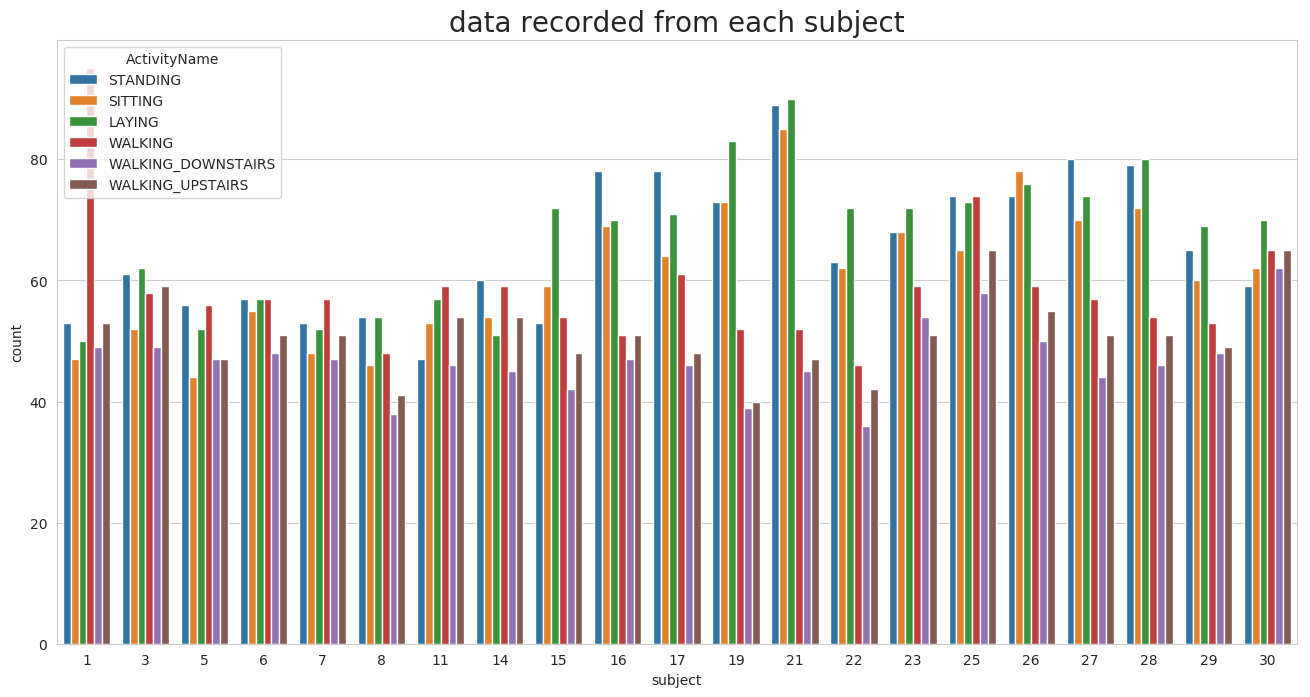

In [57]:
plt.figure(figsize=(16, 8))
plt.title('data recorded from each subject', fontsize=20)
sns.countplot(x='subject', hue='ActivityName', data=TRAIN)
plt.show()

> __The number of readings seem to be similar from all the subjects.__

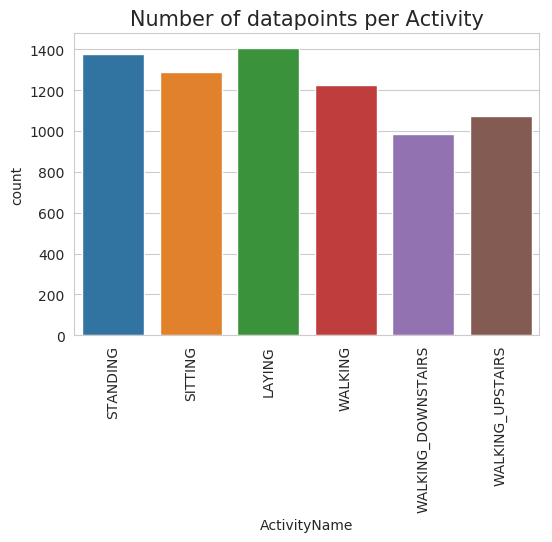

In [65]:
plt.title('Number of datapoints per Activity', fontsize=15)
sns.countplot(TRAIN.ActivityName)
plt.xticks(rotation=90)
plt.show()

> __The data is well balanced__

__CHANGING FEATURE NAMES TO MAKE THEM MORE READABLE__

In [75]:
column_names = TRAIN.columns

# Removing '()' from column names
column_names = column_names.str.replace('[()]','')
column_names = column_names.str.replace('[-]', '')
column_names = column_names.str.replace('[,]','')

TRAIN.columns = column_names
TEST.columns = column_names


__SAVING THE DF__

In [77]:
TRAIN.to_csv("UCI_HAR_Dataset/csv_files/TRAIN.csv", index=False)
TRAIN.to_csv("UCI_HAR_Dataset/csv_files/TEST.csv", index=False)

# 4. Exploratory Data Analysis

* The below features were engineered using domain knowledge.

__Static and Dynamic Activities__

* In static activities such __Sitting, Standing and Laying__, the motion information will not be very useful as there'll be little to no motion.
* In the dynamic activities such as __Walking, WalkingUpstairs and WalkingDownstairs__, the motion  will be significant.

### __<font color='red'>4.1 tBodyAccMagMean</font>__

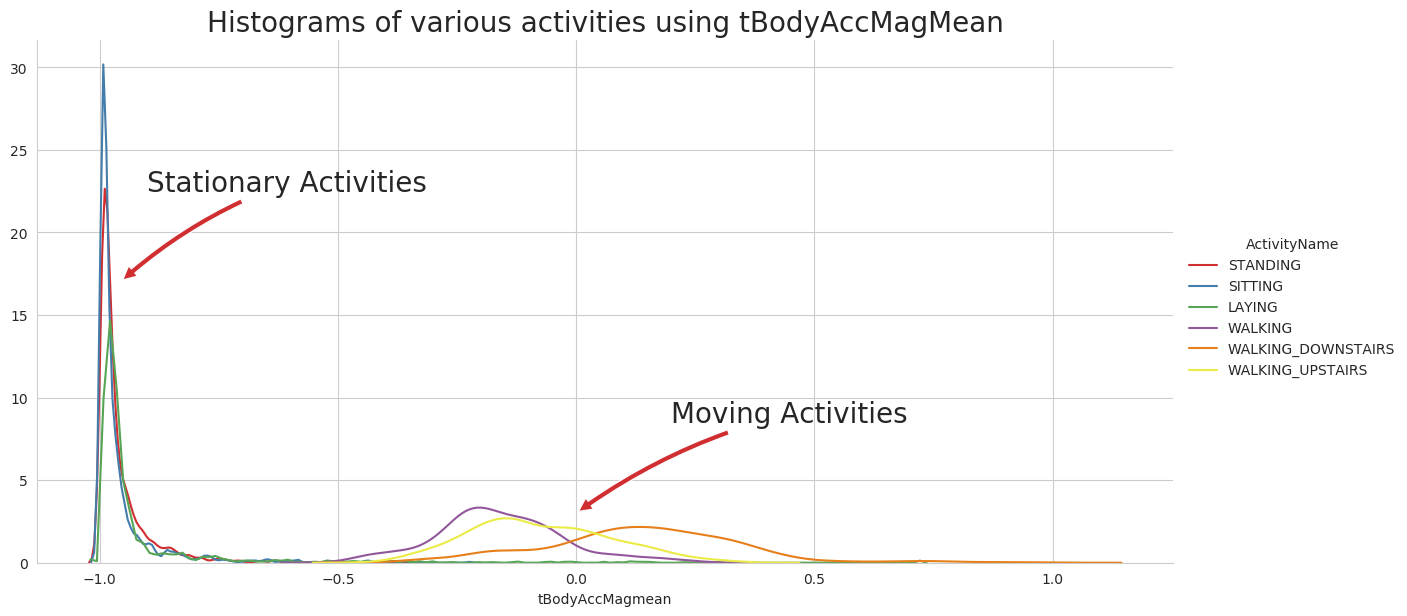

In [88]:
sns.set_palette("Set1", desat=0.80)

facetgrid = sns.FacetGrid(TRAIN, hue='ActivityName', height=6, aspect=2)
facetgrid.map(sns.distplot, 'tBodyAccMagmean', hist=False)\
    .add_legend()
plt.title('Histograms of various activities using tBodyAccMagMean', fontsize=20)
plt.annotate("Stationary Activities", xy=(-0.956, 17), xytext=(-0.9, 23), size=20,\
            va='center', ha='left',
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3, rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3, rad=0.1"))
plt.show()

__<font color='blue'>IT LOOKS LIKE THAT THE STATIONARY AND MOVING ACTIVITIES CAN BE SEPERATED BY SIMPLE IF/ELSE CONDITIONS</font>__

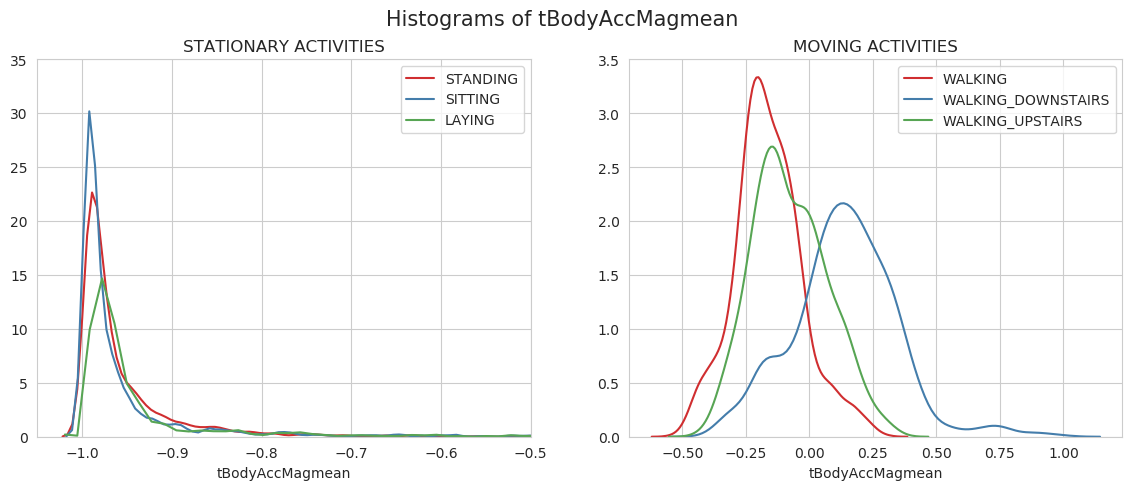

In [123]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Histograms of tBodyAccMagmean', fontsize=15)

axes[0].set_title('STATIONARY ACTIVITIES')
sns.distplot(TRAIN[(TRAIN.ActivityName == 'STANDING')].tBodyAccMagmean, hist=False, label='STANDING', ax=axes[0])
sns.distplot(TRAIN[(TRAIN.ActivityName == 'SITTING')].tBodyAccMagmean, hist=False, label='SITTING', ax=axes[0])
sns.distplot(TRAIN[(TRAIN.ActivityName == 'LAYING')].tBodyAccMagmean, hist=False, label='LAYING', ax=axes[0])
axes[0].axis([-1.05, -0.5, 0, 35])

axes[1].set_title('MOVING ACTIVITIES')
sns.distplot(TRAIN[(TRAIN.ActivityName == 'WALKING')].tBodyAccMagmean, hist=False, label='WALKING', ax=axes[1])
sns.distplot(TRAIN[(TRAIN.ActivityName == 'WALKING_DOWNSTAIRS')].tBodyAccMagmean, hist=False, label='WALKING_DOWNSTAIRS', ax=axes[1])
sns.distplot(TRAIN[(TRAIN.ActivityName == 'WALKING_UPSTAIRS')].tBodyAccMagmean, hist=False, label='WALKING_UPSTAIRS', ax=axes[1])

plt.show()

__<font color='red'>BOXPLOTS OF tBodyAccMagMean</font>__

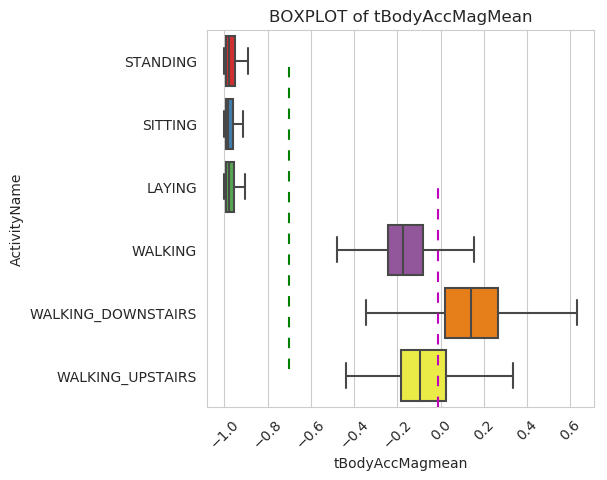

In [156]:
plt.figure(figsize=(5, 5))
plt.title('BOXPLOT of tBodyAccMagMean')
sns.boxplot(y='ActivityName', x='tBodyAccMagmean', data=TRAIN, showfliers=False, saturation=1)
plt.axvline(x=-0.7, ymin=0.1, ymax=0.9, dashes=(5,5), c='g')
plt.axvline(x=-0.01,  ymax=0.6, dashes=(5,5), c='m')
plt.xticks(rotation=45)
plt.show()

__<font color='green'>OBSERVATIONS</font>__

* if __tBodyAccMagMean < -0.7__, then the activity is a stationary one.
* if __tBodyAccMagMean > -0.6__, then the activity is a moving one.
* if __tBodyAccMagMean > -0.01__, then the activity is walking_downstairs.
* By using the above if/else conditions, the activities can be classified upto ~60% accuracy.

### __<font color='red'>4.2 angle-gravityMean</font>__

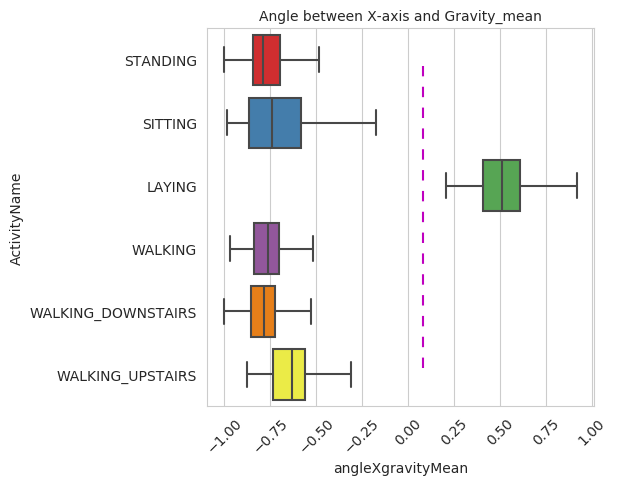

In [161]:
plt.figure(figsize=(5, 5))
sns.boxplot(y='ActivityName', x='angleXgravityMean', data=TRAIN, showfliers=False, saturation=1)
plt.axvline(x=0.08, ymin=0.1, ymax=0.9, c='m', dashes=(5,5))
plt.title('Angle between X-axis and Gravity_mean', fontsize=10)
plt.xticks(rotation=45)
plt.show()

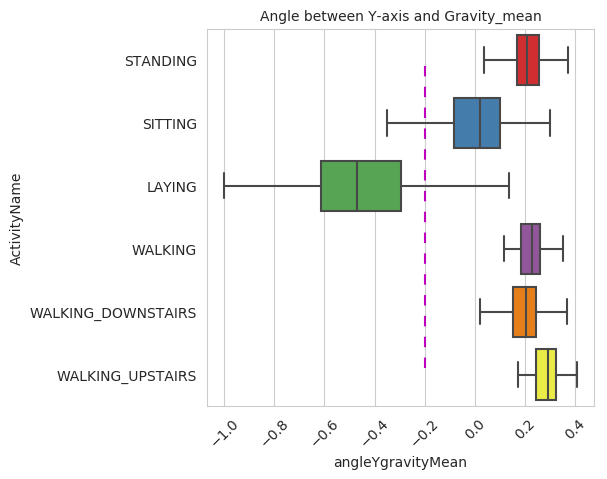

In [160]:
plt.figure(figsize=(5, 5))
sns.boxplot(y='ActivityName', x='angleYgravityMean', data=TRAIN, showfliers=False, saturation=1)
plt.axvline(x=-0.2, ymin=0.1, ymax=0.9, c='m', dashes=(5,5))
plt.title('Angle between Y-axis and Gravity_mean', fontsize=10)
plt.xticks(rotation=45)
plt.show()

__<font color='green'>OBSERVATIONS</font>__

* if __angleXgravityMean > 0.08__, then the activity is laying.
* All the datapoints belonging to Activity : Laying can be classified with a single if/else statement.

### __<font color='red'>4.3 Applying TSNE for 2D Viz</font>__

In [227]:
def plot_tsne2d(perplexity=2, X=TRAIN.drop(['subject', 'Activity', 'ActivityName'], axis=1), Y=TRAIN.ActivityName):
    
    X_2d = TSNE(n_components=2, perplexity=perplexity).fit_transform(X)
    df = pd.DataFrame({'x' : X_2d[:, 0], 'y' : X_2d[:, 1], 'label' : Y})
    sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,
           palette="Set1", markers=['^', 'v', 's', 'o', 'P', '*'])
    plt.title(f"perplexity={perplexity}", fontsize=20)
    plt.show()
    

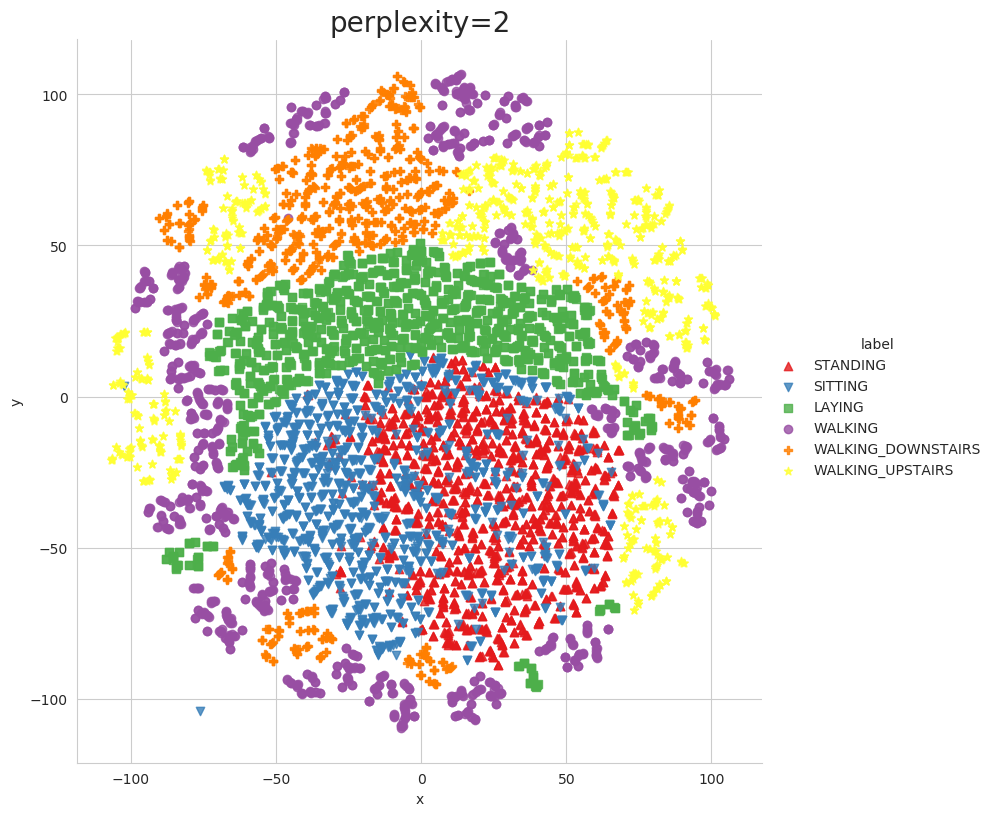

In [228]:
plot_tsne2d(perplexity=2)

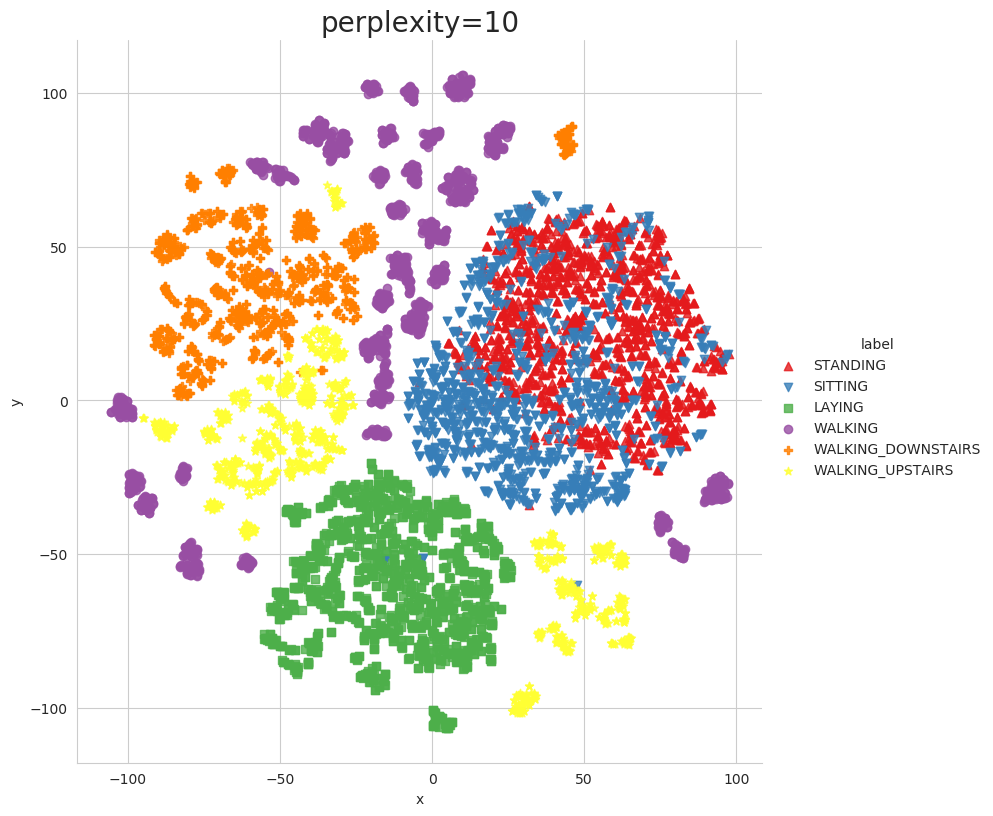

In [229]:
plot_tsne2d(perplexity=10)

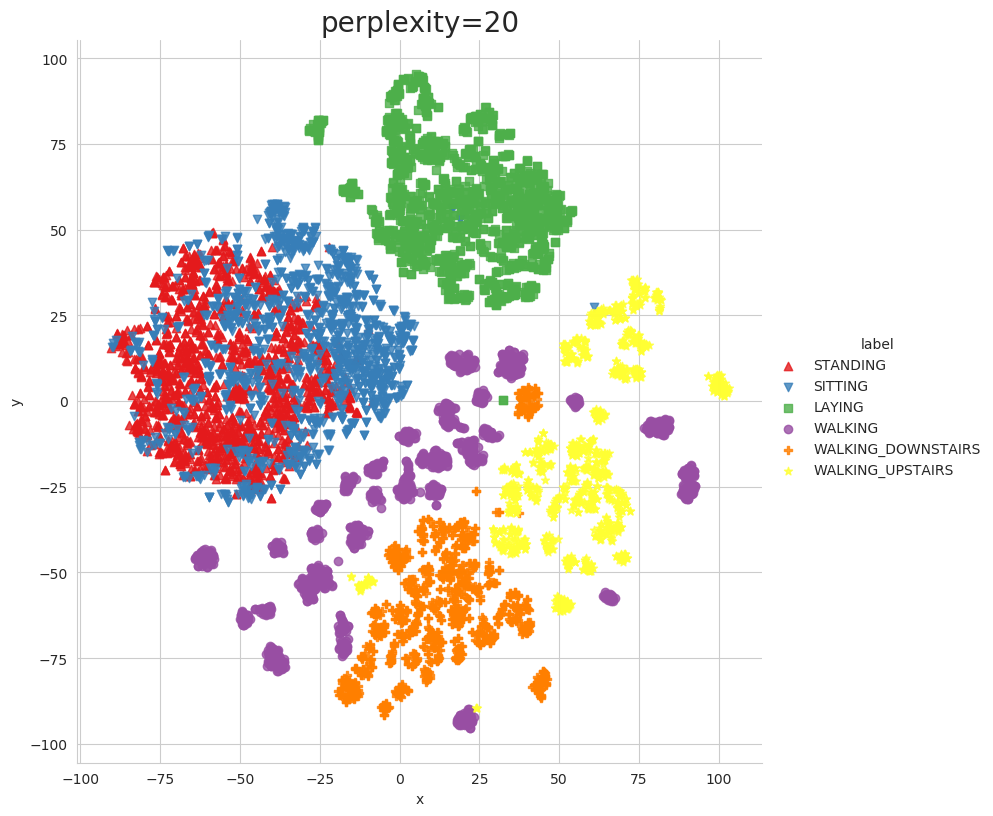

In [230]:
plot_tsne2d(perplexity=20)

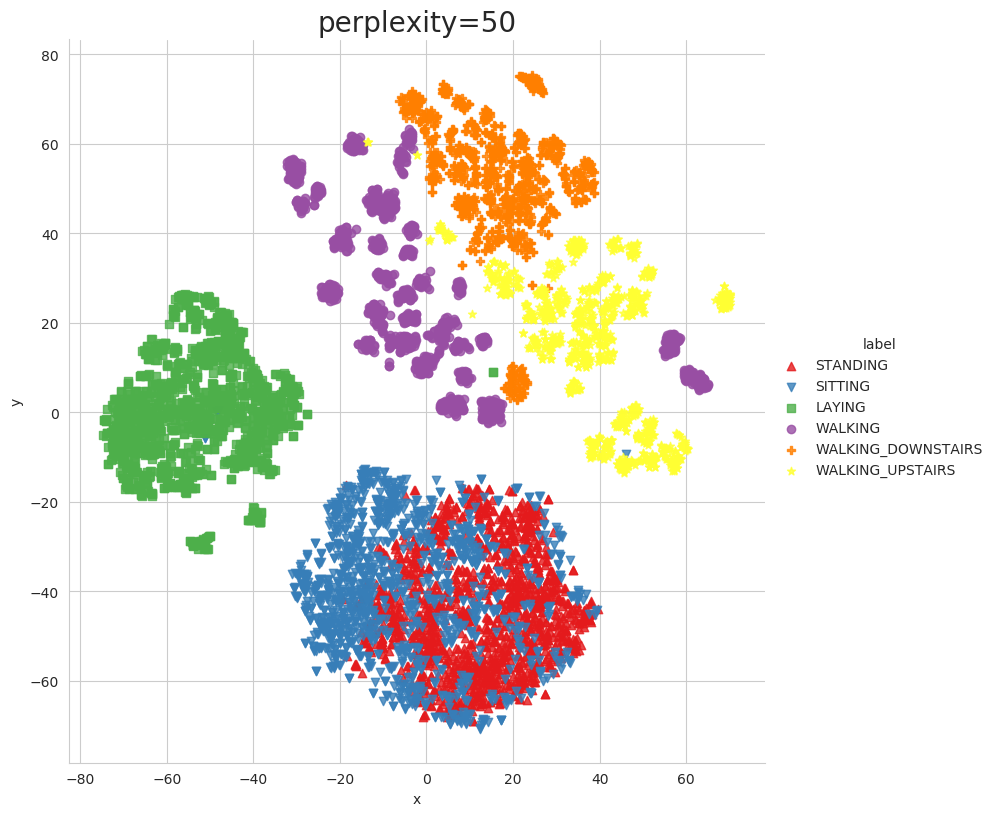

In [231]:
plot_tsne2d(perplexity=50)

__<font color='green'>OBSERVATIONS</font>__

* By looking at plots with multiple perplexities, the __SITTING and STANDING__ classes overlap this may be due to  thier similarities in motion.
* A simple linear classifier can be used to seperate all the classes expect the overlapping ones.

__Please Open the next Notebook__